In [2]:
#All import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [3]:
file_path = "Lab_Session_Data.xlsx"

purchase_data = pd.read_excel(file_path,sheet_name = "Purchase data")
irctc_stock_price = pd.read_excel(file_path,sheet_name = "IRCTC Stock Price")
thyroid_uci = pd.read_excel(file_path,sheet_name = "thyroid0387_UCI")
marketing = pd.read_excel(file_path,sheet_name = "marketing_campaign")


In [4]:
#A1
'''
1.dimensionality of data is 3
2.number of vectors are 10
3.Rank of matrix 3
'''
file_path = "Lab_Session_Data.xlsx"
purchase_data = pd.read_excel(file_path,sheet_name = "Purchase data")

A = purchase_data.iloc[:,1:4].to_numpy()
B = purchase_data.iloc[:,4].to_numpy()
rank = np.linalg.matrix_rank(A)
print("Rank of the matrix is :",rank)
X = np.linalg.pinv(A) @ B
items = purchase_data.columns[1:4]
for i,j in zip(items,X):
    print(f"{i} :",j)

Rank of the matrix is : 3
Candies (#) : 0.9999999999999989
Mangoes (Kg) : 54.99999999999999
Milk Packets (#) : 18.0


In [5]:
#A2

In [6]:
purchase_data.rename(columns={"Unnamed: 5":"Class"},inplace=True)
for i,j in enumerate(purchase_data['Payment (Rs)']):
    if j > 200:
        purchase_data.iloc[i,5] = 'RICH'
    else:
        purchase_data.iloc[i,5] = "POOR"
rich = []
poor = []
for i,j in enumerate(purchase_data['Class']):
    if j == "RICH":
        rich.append(purchase_data.iloc[i,0])
    else:
        poor.append(purchase_data.iloc[i,0])
print("Rich Customers :",rich)
print("Poor Customers :",poor)

Rich Customers : ['C_1', 'C_2', 'C_3', 'C_5', 'C_7', 'C_8']
Poor Customers : ['C_4', 'C_6', 'C_9', 'C_10']


C:\Users\lokan\AppData\Local\Temp\ipykernel_25164\151583615.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'RICH' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  purchase_data.iloc[i,5] = 'RICH'


In [7]:
#A3

1.Mean and Varience by inbuilt functions :1560.6634538152612 58496.49239931613
2.Mean and Varience manual functions : (1560.6634538152612, 58496.49239931616)
3.Since time manual = 0.0001397700048983097 is more less than time inbuilt = 0.0003925400087609887 so we can say manual code is faster
(1560.6634538152612, 58496.49239931616)
4.1550.7060000000001 sample mean and total mean is likely the same but less
5.1698.9526315789474 sample mean and total mean is likely the same but more
6.Probability of making a loss 0.4979919678714859
7.Probability of making a loss on wednesday 0.11693548387096774
8.Conditional probability of making profit given that today is wednesday 0.0023387096774193546


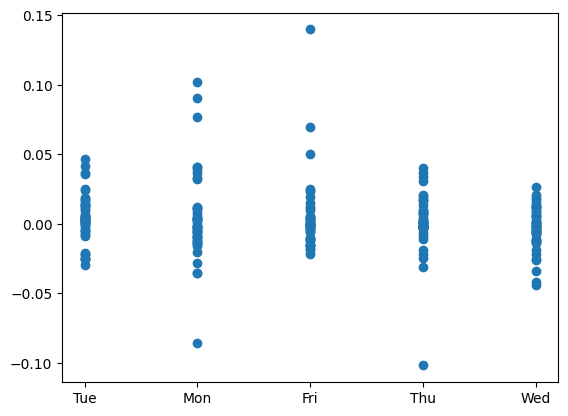

In [21]:
mean = np.mean(irctc_stock_price["Price"])
variance = np.var(irctc_stock_price["Price"])
print(f"1.Mean and Varience by inbuilt functions :{mean} {variance}")
print(f"2.Mean and Varience manual functions :",mean_var(irctc_stock_price['Price']))
def mean_var(input):
    n = len(input)
    mean = sum(input)/n
    var = 0
    for x in input:
        var += (x - mean)**2
    varience = var/n
    return mean,varience
def average_execution_time(fun,arg, runs=10):
    total_time = 0
    for _ in range(runs):
        start = time.perf_counter()
        fun(arg)
        end = time.perf_counter()
        total_time += (end - start)

    avg_time = total_time / runs
    return avg_time
def mean_var_inbuilt(input):
    mean = np.mean(input)
    var = np.var(input)
    return mean,var
time_manual = average_execution_time(mean_var,irctc_stock_price["Price"], runs=10)
time_inbuilt = average_execution_time(mean_var_inbuilt,irctc_stock_price["Price"], runs=10)
print(f"3.Since time manual = {time_manual} is more less than time inbuilt = {time_inbuilt} so we can say manual code is faster")
print(mean_var(irctc_stock_price["Price"]))
print(f"4.{np.mean(irctc_stock_price.loc[irctc_stock_price['Day']=='Wed','Price'])} sample mean and total mean is likely the same but less")
print(f"5.{np.mean(irctc_stock_price.loc[irctc_stock_price['Month']=='Apr','Price'])} sample mean and total mean is likely the same but more")
print(f"6.Probability of making a loss {sum(irctc_stock_price['Chg%'].apply(lambda x:x<0))/len(irctc_stock_price['Chg%'])}")
x = sum(irctc_stock_price.loc[irctc_stock_price['Day']=='Wed','Chg%'].apply(lambda x:x<0))/248
print(f"7.Probability of making a loss on wednesday {x}")
print(f"8.Conditional probability of making profit given that today is wednesday {x/len(irctc_stock_price.loc[irctc_stock_price['Day']=='Wed','Price'])}")
plt.scatter(irctc_stock_price['Day'],irctc_stock_price['Chg%'])

In [9]:
#A4

In [28]:

#1. TT4,T4U,FTI,TBG are numeric data types rest all are nominal data types
#2. most of the nominal datatypes are binary encoded and sex is one hot encoded
#3. 
print(thyroid_uci.describe())
#4.
print((thyroid_uci == '?').sum())
#5.
cols = ["age", "TT4", "T4U", "FTI", "TBG"]

mean_values = thyroid_uci[cols].mean()
variance_values = thyroid_uci[cols].var()

print(mean_values, variance_values)


          Record ID           age           TT4           T4U           FTI  \
count  9.172000e+03  9.172000e+03  8.730000e+03  8.363000e+03  8.370000e+03   
mean   8.529473e+08  7.746868e-18  7.162401e-17  1.788974e-14  4.074797e-17   
std    7.581969e+06  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    8.408010e+08 -6.128146e-02 -2.843622e+00 -4.023028e+00 -2.701234e+00   
25%    8.504090e+08 -3.087546e-02 -5.783252e-01 -5.792347e-01 -4.967491e-01   
50%    8.510040e+08 -1.567246e-02 -1.252657e-01 -8.013419e-02 -1.116862e-01   
75%    8.607110e+08 -4.692510e-03  4.610465e-01  4.439214e-01  3.455760e-01   
max    8.701190e+08  5.528187e+01  1.309341e+01  6.757543e+00  1.846760e+01   

                TBG  
count  3.490000e+02  
mean  -5.598832e-17  
std    1.000000e+00  
min   -1.412208e+00  
25%   -4.207706e-01  
50%   -1.835847e-01  
75%    5.360131e-02  
max    8.070487e+00  
Record ID                       0
age                             0
sex                   

In [11]:
#A5

In [12]:
data1 = thyroid_uci.iloc[0]
data2 = thyroid_uci.iloc[1]
def similarities(data1,data2):
    f00,f01,f10,f11 = 0,0,0,0
    for i,j in zip(data1,data2):
        if (i == 't' or i == 'f') and (j == 't' or j == 'f'):
            if i == 't' and j == 't':
                f11 += 1
            elif i == 'f' and j == 't':
                f01 += 1
            elif i == 't' and j == 'f':
                f10 += 1
            elif i == 'f' and j == 'f':
                f00 += 1
        else:
            continue
    smc = (f00+f11)/(f00+f11+f10+f01)
    jc = (f11)/(f11+f10+f01)
    return smc,jc
smc,jc = similarities(data1,data2)
print(f"Simple Matching Coefficient :",smc)
print(f"Jaccard Coefficient :",jc)

Simple Matching Coefficient : 0.85
Jaccard Coefficient : 0.25


In [13]:
#A6

In [14]:
def cos(a,b):
    pd.set_option('future.no_silent_downcasting', True)
    A = a.replace('f',0).replace('t',1).replace('?',0).replace('F',0).replace('M',1)
    B = b.replace('f',0).replace('t',1).replace('?',0).replace('F',0).replace('M',1)
    A_len = np.linalg.norm(A)
    B_len = np.linalg.norm(B)
    AB = sum(i*j for i,j in zip(A,B))
    return AB/(A_len*B_len)
cosine_sim = cos(thyroid_uci.iloc[0,1:-2],thyroid_uci.iloc[1,1:-2])
print("Cosine Similarity is :",cosine_sim)

Cosine Similarity is : 0.22101789810378902


In [15]:
#A7

<Axes: >

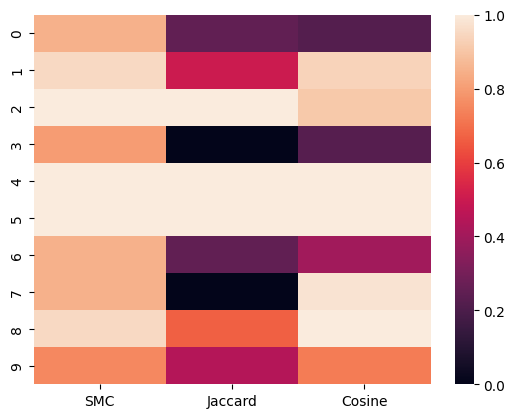

In [16]:
result = []
def all_similarities(a,b):
    smc,jc = similarities(a,b)
    co = cos(a,b)
    return [smc,jc,co]
for i in range(0,20,2):
    result.append(all_similarities(thyroid_uci.iloc[i,1:-2],thyroid_uci.iloc[i+1,1:-2]))
columns = ['SMC', 'Jaccard', 'Cosine']
df = pd.DataFrame(result, columns=columns)
sns.heatmap(df)

In [17]:
#A8

In [18]:
vals = []

col = ['TT4','T4U','FTI','TBG']
thyroid_uci[col] = thyroid_uci[col].replace('?',np.round(np.median(thyroid_uci[col].replace('?',np.nan))))

thyroid_uci
        

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,NaN,f,NaN,f,NaN,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,36,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022,56,M,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,NaN,SVI,NO CONDITION
9168,870119023,22,M,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,NaN,SVI,NO CONDITION
9169,870119025,69,M,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,NaN,SVI,I
9170,870119027,47,F,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,NaN,other,NO CONDITION


In [19]:
#A9

In [20]:
cols = ['age','TT4','T4U','FTI','TBG']
means = {}
stds = {}

for col in cols:
    means[col] = thyroid_uci[col].mean()
    stds[col] = thyroid_uci[col].std()
    thyroid_uci[col] = thyroid_uci[col].apply(lambda x: (x - means[col]) / stds[col])

thyroid_uci[cols].mean(), thyroid_uci[cols].std()

(age    7.746868e-18
 TT4    7.162401e-17
 T4U    1.788974e-14
 FTI    4.074797e-17
 TBG   -5.598832e-17
 dtype: float64,
 age    1.0
 TT4    1.0
 T4U    1.0
 FTI    1.0
 TBG    1.0
 dtype: float64)